# MatrixProfile-ts and STUMPY (1-dimensional TIme Series Analysis)

## Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
from datetime import datetime , timedelta, timezone
from sklearn.decomposition import PCA
import operator
import random

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
from matrixprofile import *
from matrixprofile.discords import discords

In [3]:
import stumpy

## matrixprofile-ts

In [4]:
df = pd.read_csv('sp500-1314.csv')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()
df.head()

MMM    ABT   ABBV    ACN    ACE    ACT   ADBE    ADT    AES  \
Date                                                                        
2013-01-02  90.50  30.84  32.71  65.74  78.01  84.21  38.34  44.42  10.71   
2013-01-03  90.39  32.02  32.44  65.50  78.42  85.92  37.75  44.51  10.65   
2013-01-04  91.06  31.83  32.03  65.86  78.52  85.30  38.13  45.12  10.90   
2013-01-07  91.18  32.09  32.10  65.58  77.57  85.66  37.94  45.04  10.56   
2013-01-08  91.19  32.10  31.40  65.96  76.30  86.68  38.14  44.85  10.56   

              AET  ...    XEL   XRX   XLNX     XL    XYL   YHOO    YUM    ZMH  \
Date               ...                                                          
2013-01-02  45.05  ...  25.35  6.88  35.55  24.39  26.67  20.08  64.50  66.46   
2013-01-03  44.10  ...  25.28  6.88  35.48  24.44  26.58  19.78  64.90  67.41   
2013-01-04  44.30  ...  25.37  6.81  34.98  25.05  26.54  19.86  65.61  67.75   
2013-01-07  44.97  ...  25.10  6.92  34.84  25.01  26.19  19.40  65.20  67.92   
2013-01-08  43.42  ...  25.15  6.91  34.13  24.89  25.87  19.66  62.46  68.02   

             ZION  ZTS  
Date                    
2013-01-02  21.77  NaN  
2013-01-03  21.80  NaN  
2013-01-04  22.42  NaN  
2013-01-07  22.31  NaN  
2013-01-08  21.87  NaN  

[5 rows x 496 columns]

In [6]:
temp = pd.DataFrame(df['MMM'])
temp.shape

(504, 1)

In [7]:
temp.head()

MMM
Date             
2013-01-02  90.50
2013-01-03  90.39
2013-01-04  91.06
2013-01-07  91.18
2013-01-08  91.19

In [8]:
#temp = temp.resample('1H').sum()
a = temp.values.squeeze()

In [9]:
temp.head(20)

MMM
Date             
2013-01-02  90.50
2013-01-03  90.39
2013-01-04  91.06
2013-01-07  91.18
2013-01-08  91.19
2013-01-09  92.06
2013-01-10  92.51
2013-01-11  91.93
2013-01-14  92.70
2013-01-15  92.90
2013-01-16  93.19
2013-01-17  93.65
2013-01-18  94.28
2013-01-22  94.84
2013-01-23  95.00
2013-01-24  95.17
2013-01-25  96.05
2013-01-28  96.10
2013-01-29  97.21
2013-01-30  96.25

In [10]:
m = 24
profile = matrixProfile.stomp(a,m)

temp['profile'] = np.append(profile[0],np.zeros(m-1)+np.nan)
temp['profile_index'] = np.append(profile[1], np.zeros(m - 1) + np.nan)

ex_zone = 24
anoms = discords(temp['profile'], ex_zone, k=15)

temp.iloc[anoms]

MMM   profile  profile_index
Date                                       
2013-05-20  107.33  4.984692           48.0
2014-06-17  142.08  4.540709          323.0
2013-12-18  132.58  4.483164          424.0
2013-04-01  101.50  4.428808          138.0
2014-02-24  129.92  3.866216          176.0
2013-09-13  115.23  3.866216          287.0
2014-11-14  158.00  3.829675          302.0
2013-11-07  122.81  3.744174          140.0
2014-08-26  143.83  3.372987           51.0
2014-03-28  131.88  3.122419          337.0
2013-07-18  111.58  2.751171          211.0
2014-07-22  143.49  2.726743          152.0
2014-05-02  137.70  2.708145           25.0
2013-02-06   98.05  2.285917           10.0
2014-09-30  140.92  1.359432          155.0

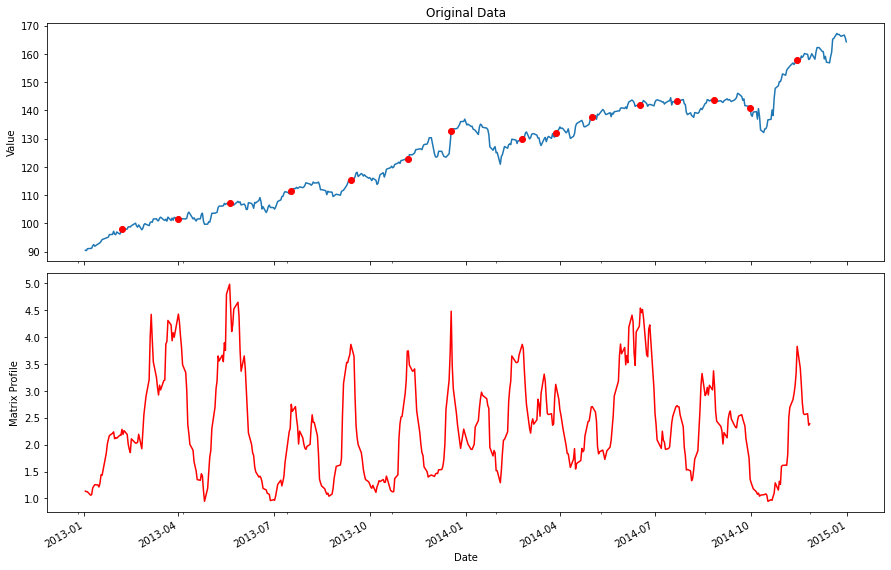

In [11]:
anomalies = temp.iloc[anoms]

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
ax1.plot(temp['MMM'])
#.plot(ax=ax1, title='Raw Data')
ax1.plot(anomalies["MMM"], 'ro')
ax1.set_title('Original Data')
ax1.set_ylabel('Value')

#Plot the Matrix Profile
temp['profile'].plot(ax=ax2, c='r', ylabel='Matrix Profile')

plt.subplots_adjust(wspace=0, hspace=.05)

plt.savefig("matrixprofile-ts.jpeg", dpi = 100)

plt.show()

## STUMPY

In [12]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

drum pressure  excess oxygen  water level  steam flow
0      320.08239       2.506774     0.032701    9.302970
1      321.71099       2.545908     0.284799    9.662621
2      320.91331       2.360562     0.203652   10.990955
3      325.00252       0.027054     0.326187   12.430107
4      326.65276       0.285649     0.753776   13.681666

In [13]:
pca = PCA(n_components=1)
pca.fit(steam_df.values)

PCA(n_components=1)

In [14]:
Z = pca.transform(steam_df)
Z = pd.DataFrame(Z, columns=['pc1'], index=steam_df.index) #may want to set the index as the date next time
Z.head()

pc1
0 -9.533833
1 -7.890729
2 -8.611919
3 -4.373898
4 -2.670548

In [15]:
m = 640
mp = stumpy.stump(Z['pc1'], m)

In [16]:
x = []
y = []

for i in range(1, 2001):
    x.append(np.argsort(mp[:, 0])[-i])
    y.append(Z['pc1'][np.argsort(mp[:, 0])[-i]])


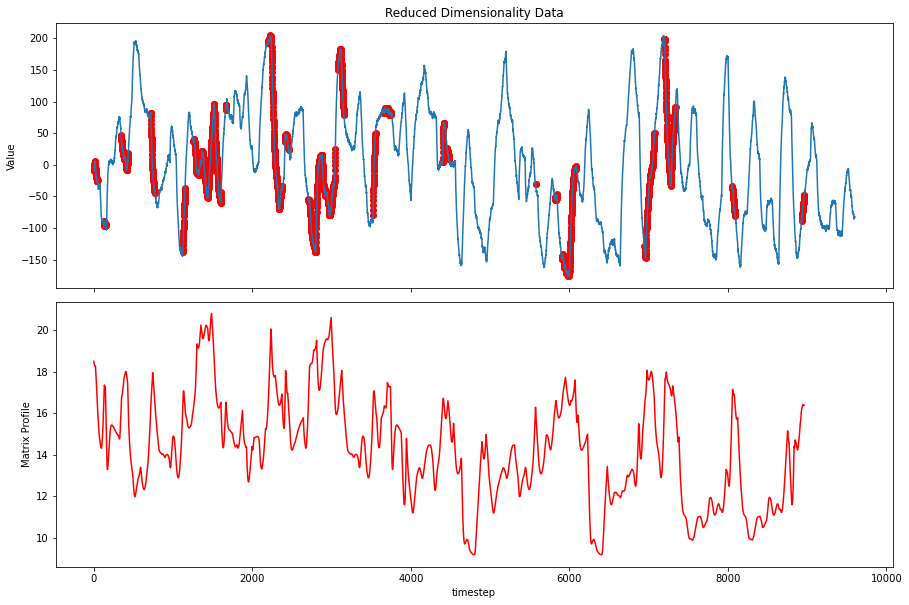

In [17]:
motif_idx = np.argsort(mp[:, 0])[0]

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(15,10))

ax1.plot(Z['pc1'].values)
ax1.scatter(x, y, c = 'r', )
ax1.set_title('Reduced Dimensionality Data')
ax1.set_ylabel('Value')

ax2.plot(mp[:, 0], c = 'red')
ax2.set_ylabel('Matrix Profile')
ax2.set_xlabel('timestep')

plt.subplots_adjust(wspace=0, hspace=.05)

plt.savefig("stumpy.jpeg", dpi = 100)


plt.show()

In [18]:
#ax2.plot(mp[:, 0])